<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%204%3A%20Time%20Series%20Analysis/4_4_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Analysis**
## Regression Models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem Statement

Forecasting electricity production from wind energy is a crucial problem for operations management in wind turbines. Wind energy is strongly correlated with the wind speed. In this case study forecasting algorithms are applied in wind speed prediction 

In [ ]:
#Dataset import
url='https://drive.google.com/file/d/1-ohfTF75ZOxMfgaVx6minLsxsCiUfObD/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path,index_col = 0)

In [ ]:
df.head()

,Date,Hour,Temperature,WindSpeed,Humidity,WindDirection,Pressure
0,1/6/2015,0,13.4,0.8,85.0,118.0,1018.0
1,1/6/2015,1,12.9,0.6,88.0,121.0,1018.2
2,1/6/2015,2,12.6,0.7,88.0,164.0,1018.4
3,1/6/2015,3,12.8,0.7,88.0,134.0,1018.5
4,1/6/2015,4,14.6,0.6,86.0,31.0,1018.7


Machine learning models may be employed to forecast future values. Let $y_t$ is the variable at time $t$ we want to predict and $\mathbf x_t$ is the $d$ dimensional exogenous variable. Forecasting model can be constructed as 

$$y_t = f(y_{t-1},y_{t-2},\dotsi,y_{t-l},x_{t-1},x_{t-2},\dotsi,x_{t-l}) $$

where $f()$ is the any machine learning algorithm you want to use

#### Prepare the Data

First we need to prepare the input and output data as follows:

$$ X = \begin{bmatrix}
\mathbf x_1 & \mathbf x_2 & \dotsi & \mathbf x_l & y_1 & y_2 & \dotsi & y_l\\
\mathbf x_2 & \mathbf x_3 & \dotsi & \mathbf x_{l+1} & y_2 & y_3 & \dotsi &y_{l+1}\\
\vdots & \vdots & \ddots & \vdots &\vdots &\vdots &\ddots &\vdots & \\
\mathbf x_{t-l} & \mathbf x_{t-l+1} & \dotsi & \mathbf x_{t-1} & y_{t-l} & y_{t-l+1} & \dotsi &y_{t-1}
\end{bmatrix}
$$

$$ y = \begin{bmatrix}
y_{l+1}\\
y_{l+2}\\
\vdots\\
y_t
\end{bmatrix}
$$

In [ ]:
def make_data(data, target_col, lag):
    X = []
    y = []
    for i in range(len(data)-lag):
        X.append(data[i:i+lag,:].ravel())
        y.append(data[i+lag,target_col])

    return np.array(X), np.array(y)



First divide the data into training and test sets. We are going to use last 24 hours of data as test and the rest will be used as training.After transforming the time series data into input and target variables we can utilize out favorite machine learning algorithm to perform one step ahead forecasting

In [ ]:
lag = 24
X,y = make_data(df.values[:,1:], 2,lag)
X_train = X[:-24]
X_test = X[-24:]
y_train = y[:-24]
y_test = y[-24:]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
mdl = RandomForestRegressor()
mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)



MSE Score: 0.3458634583333331


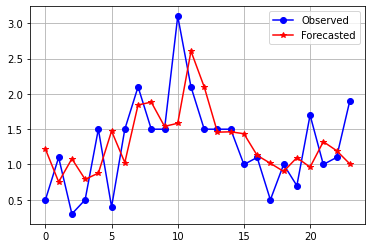

In [ ]:
plt.plot(y_test, "-ob", label = "Observed")
plt.plot(ypred, "-*r", label = "Forecasted")
plt.grid()
plt.legend()
print("MSE Score:", mean_squared_error(y_test, ypred))